In [2]:
##Question 1

import numpy as np
import math

# A. Function to compute the trace from a 1D array
def trace1D(mat1D):
    array_len = mat1D.shape[0]
    print("You have provided an array of length", array_len)
    
    n = int(math.sqrt(array_len))  # Ensure perfect square
    if n * n != array_len:
        raise Exception("Not enough elements for a square matrix.")

    trace_sum = sum(mat1D[k * n + k] for k in range(n))  # Sum diagonal elements
    return trace_sum

# B. Function to print the transpose manually
def print_transpose(mat1D):
    n = int(math.sqrt(len(mat1D)))
    print("\nTranspose of the matrix:")
    
    for j in range(n):  # Loop over columns
        for i in range(n):  # Loop over rows
            print(mat1D[i * n + j], end=" ")  # Access transposed index
        print()

# C. Function to compute matrix-vector multiplication manually
def matrix_vector_product(mat1D, vector):
    n = int(math.sqrt(len(mat1D)))
    
    if len(vector) != n:
        raise Exception("Vector length does not match matrix dimensions.")
    
    product = [sum(mat1D[i * n + j] * vector[j] for j in range(n)) for i in range(n)]
    
    print("\nProduct of the matrix with the vector (as row):")
    print(product)

# Generate 1D array
mat1D = np.arange(0, 100, 1)

# Compute trace and display results
try:
    trace_value = trace1D(mat1D)
    print("\nTrace of the suggested matrix is:", trace_value)

    print_transpose(mat1D)

    vector = np.arange(0, 10, 1)  # Given vector
    matrix_vector_product(mat1D, vector)

except Exception as e:
    print("Error:", e)


You have provided an array of length 100

Trace of the suggested matrix is: 495

Transpose of the matrix:
0 10 20 30 40 50 60 70 80 90 
1 11 21 31 41 51 61 71 81 91 
2 12 22 32 42 52 62 72 82 92 
3 13 23 33 43 53 63 73 83 93 
4 14 24 34 44 54 64 74 84 94 
5 15 25 35 45 55 65 75 85 95 
6 16 26 36 46 56 66 76 86 96 
7 17 27 37 47 57 67 77 87 97 
8 18 28 38 48 58 68 78 88 98 
9 19 29 39 49 59 69 79 89 99 

Product of the matrix with the vector (as row):
[285, 735, 1185, 1635, 2085, 2535, 2985, 3435, 3885, 4335]


In [4]:
# Show the output of the following
print("Trace of the suggested matrix is: {}".format(trace1D(np.arange(0,100,1))))

You have provided an array of length 100
Trace of the suggested matrix is: 495


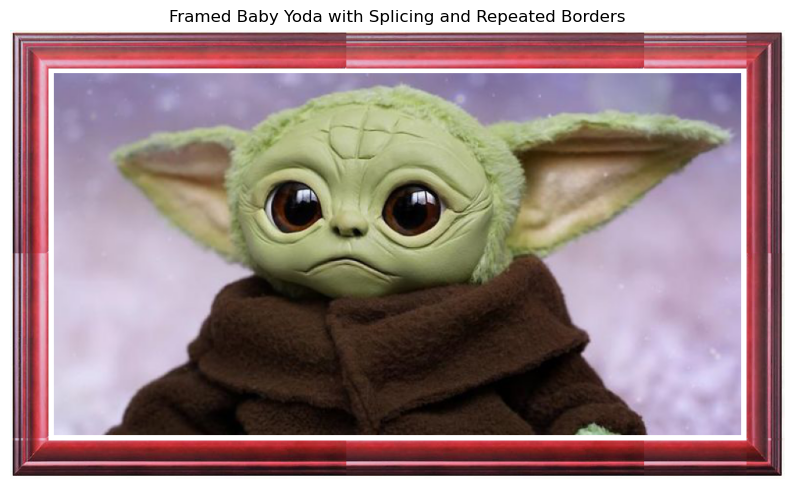

In [6]:
## Question 2 A

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the frame and image using matplotlib
frame = mpimg.imread("./frame.jpeg")  # Load frame
image = mpimg.imread("./BabyYoda.png")  # Load Baby Yoda image

# Convert to uint8 format if loaded as float (matplotlib loads some images as float in range 0-1)
if frame.dtype == np.float32 or frame.dtype == np.float64:
    frame = (frame * 255).astype(np.uint8)
if image.dtype == np.float32 or image.dtype == np.float64:
    image = (image * 255).astype(np.uint8)

# Get dimensions of the images
img_h, img_w, _ = image.shape  # Baby Yoda image size
frame_h, frame_w, _ = frame.shape  # Frame size

# Approximate frame border thickness
border_thickness = 50  # Adjust as needed

# Extract frame parts using slicing
# Corners
top_left = frame[:border_thickness, :border_thickness]  # Top-left corner
top_right = frame[:border_thickness, -border_thickness:]  # Top-right corner
bottom_left = frame[-border_thickness:, :border_thickness]  # Bottom-left corner
bottom_right = frame[-border_thickness:, -border_thickness:]  # Bottom-right corner

# Borders
top_border = frame[:border_thickness, border_thickness:-border_thickness]  # Top border (excluding corners)
bottom_border = frame[-border_thickness:, border_thickness:-border_thickness]  # Bottom border
left_border = frame[border_thickness:-border_thickness, :border_thickness]  # Left border
right_border = frame[border_thickness:-border_thickness, -border_thickness:]  # Right border

# Repeat the borders to match Baby Yoda image dimensions 
top_border_tiled = np.tile(top_border, (1, img_w // top_border.shape[1] + 1, 1))[:, :img_w, :]  # Repeat horizontally
bottom_border_tiled = np.tile(bottom_border, (1, img_w // bottom_border.shape[1] + 1, 1))[:, :img_w, :]
left_border_tiled = np.tile(left_border, (img_h // left_border.shape[0] + 1, 1, 1))[:img_h, :, :]  # Repeat vertically
right_border_tiled = np.tile(right_border, (img_h // right_border.shape[0] + 1, 1, 1))[:img_h, :, :]

# Create an empty canvas for the final framed image
framed_image = np.ones((img_h + 2 * border_thickness, img_w + 2 * border_thickness, 3), dtype=np.uint8) * 255

# Convert the image to RGB by selecting only the first three channels
image_rgb = image[:, :, :3]  # Select only the RGB channels

# Place image at the center 
framed_image[border_thickness:border_thickness + img_h, border_thickness:border_thickness + img_w] = image_rgb


# Place borders
framed_image[:border_thickness, border_thickness:-border_thickness] = top_border_tiled  # Top
framed_image[-border_thickness:, border_thickness:-border_thickness] = bottom_border_tiled  # Bottom
framed_image[border_thickness:-border_thickness, :border_thickness] = left_border_tiled  # Left
framed_image[border_thickness:-border_thickness, -border_thickness:] = right_border_tiled  # Right

# Place corners
framed_image[:border_thickness, :border_thickness] = top_left  # Top-left
framed_image[:border_thickness, -border_thickness:] = top_right  # Top-right
framed_image[-border_thickness:, :border_thickness] = bottom_left  # Bottom-left
framed_image[-border_thickness:, -border_thickness:] = bottom_right  # Bottom-right

# ---- Display the final framed image ----
plt.figure(figsize=(10, 6))
plt.imshow(framed_image)
plt.axis("off")
plt.title("Framed Baby Yoda with Splicing and Repeated Borders")
plt.show()


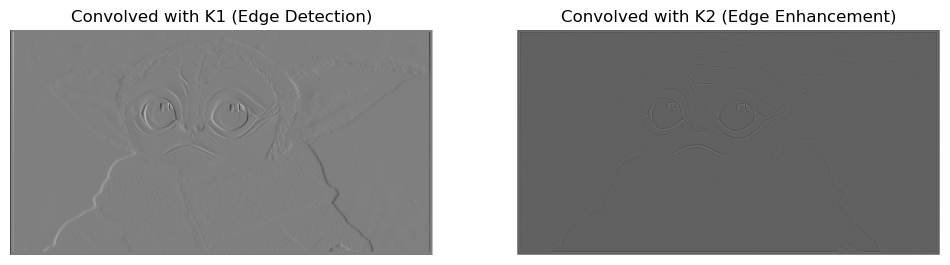

In [8]:
## Question 2 B
# Re-import necessary modules
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load the Baby Yoda image
myGray = mpimg.imread("./BabyYoda.png")

# Convert to grayscale using Rec.709 weighted sum
color_weight = [0.2125, 0.7154, 0.0721]  # Standard grayscale conversion weights
myGray_gray = np.dot(myGray[..., :3], color_weight)  # Convert RGB to grayscale

# Pad the grayscale image (1 pixel on all sides)
myGray_padded = np.pad(myGray_gray, pad_width=1, mode='constant', constant_values=0)

# Get dimensions of the original grayscale image
m, n = myGray_gray.shape

# Define convolution kernels
K1 = np.array([[1,  0, -1],
               [2,  0, -2],
               [1,  0, -1]])  # Sobel-like edge detection

K2 = np.array([[ 0, -1,  0],
               [-1,  4, -1],
               [ 0, -1,  0]])  # Laplacian edge enhancement

# Initialize convolved images
myGray_conv_K1 = np.zeros((m, n))
myGray_conv_K2 = np.zeros((m, n))

# Perform convolution using a sliding window
for i in range(m):
    for j in range(n):
        # Extract a 3x3 window from the padded image
        myGray_window = myGray_padded[i:i+3, j:j+3]
        
        # Apply convolution (element-wise multiplication and sum)
        myGray_conv_K1[i, j] = np.sum(myGray_window * K1)
        myGray_conv_K2[i, j] = np.sum(myGray_window * K2)

# Normalize convolved images for better visibility
myGray_conv_K1 = (myGray_conv_K1 - myGray_conv_K1.min()) / (myGray_conv_K1.max() - myGray_conv_K1.min()) * 255
myGray_conv_K2 = (myGray_conv_K2 - myGray_conv_K2.min()) / (myGray_conv_K2.max() - myGray_conv_K2.min()) * 255

# Convert to uint8 for correct visualization
myGray_conv_K1 = myGray_conv_K1.astype(np.uint8)
myGray_conv_K2 = myGray_conv_K2.astype(np.uint8)

# Display only the convolved images with K1 and K2
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Convolved Image using K1 (Edge Detection)
ax[0].imshow(myGray_conv_K1, cmap='gray')
ax[0].set_title("Convolved with K1 (Edge Detection)")
ax[0].axis('off')

# Convolved Image using K2 (Edge Enhancement)
ax[1].imshow(myGray_conv_K2, cmap='gray')
ax[1].set_title("Convolved with K2 (Edge Enhancement)")
ax[1].axis('off')

plt.show()


/var/folders/y0/wcbnmj7135vfz0qfgyf87gs80000gn/T/ipykernel_12360/997446745.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot(iris_normalized, vert=True, patch_artist=True, labels=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])


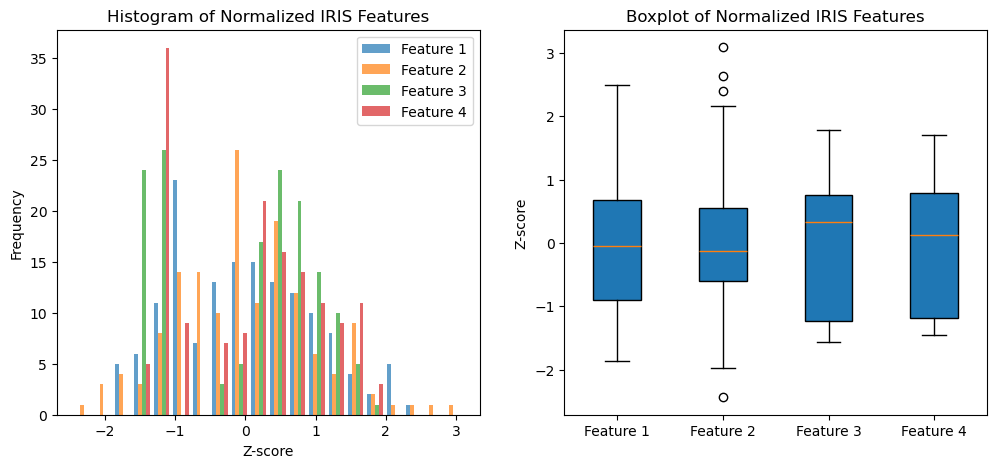

In [ ]:
## Question 3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the IRIS dataset
iris = datasets.load_iris().data  # Shape: (150, 4)

# Compute mean and standard deviation using NumPy (along axis=0 for each feature)
iris_mean = np.mean(iris, axis=0)
iris_std = np.std(iris, axis=0)

# Apply z-score normalization (broadcasting)
iris_normalized = (iris - iris_mean) / iris_std

# ---- Visualization ----
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of normalized data
ax[0].hist(iris_normalized, bins=20, label=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'], alpha=0.7)
ax[0].set_title("Histogram of Normalized IRIS Features")
ax[0].set_xlabel("Z-score")
ax[0].set_ylabel("Frequency")
ax[0].legend()

# Boxplot of normalized features
ax[1].boxplot(iris_normalized, vert=True, patch_artist=True, labels=['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4'])
ax[1].set_title("Boxplot of Normalized IRIS Features")
ax[1].set_ylabel("Z-score")

plt.show()

In [ ]:
## Question 4
#code from NB1 to create term-document matrix 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer,ENGLISH_STOP_WORDS

vectorizer = CountVectorizer()

document1 = " I bought this game as a gift for my 8 year old daughter who loves games. I was expecting lots of gross foods--but I was surprised at the inappropriate cards--eyeball, human burger, blood salsa, and fresh brains. Those are not foods that typical people find in their refrigerators. We do not practice cannibalism. She was very upset when I suggested that we just take out those cards. I seriously wonder who thinks that those cards are appropriate for kids. The rest of the game is funny, but I wish I would have looked through the cards before I gave it to her."
document2 = "Absolutely love Taco vs burrito. I️ bought it as a kickstarter. I️ originally bought this game because my husband and I️ love to play games with friends but most of them are not targeted to children so I️ got this to add to our collection so we had options when our friends with kids came. I’m not gonna lie I️ did No have high expectations for this to be a game for adult but I️ was Sooooo wrong!!!!!! We have now played with several different groups of friends and it’s a hit!!!!! With adults it becomes a major strategy game. I️ have Now bought it as a Christmas present bc it was so well received!!!!"
document3 = " Unlike several of the reviewers here, I didn't purchase this originally for when kids are around. I bought it because of the reviews that said the adults all loved it too! I'm always on the lookout for games playable by 2 people and this was a great one. It's incredibly simple, but brings a lot of laughs with the competition and sabotage. I'm really glad I gave this game a chance."
doc_list = [document1, document2, document3]

In [ ]:
# Fit a bag of words
bow = vectorizer.fit_transform(doc_list)
print("Checking the data structure: ", type(bow))
print ("Feature (terms) Names: \n",vectorizer.get_feature_names_out())

Checking the data structure:  <class 'scipy.sparse._csr.csr_matrix'>
Feature (terms) Names: 
 ['absolutely' 'add' 'adult' 'adults' 'all' 'always' 'and' 'appropriate'
 'are' 'around' 'as' 'at' 'bc' 'be' 'because' 'becomes' 'before' 'blood'
 'bought' 'brains' 'brings' 'burger' 'burrito' 'but' 'by' 'came'
 'cannibalism' 'cards' 'chance' 'children' 'christmas' 'collection'
 'competition' 'daughter' 'did' 'didn' 'different' 'do' 'expectations'
 'expecting' 'eyeball' 'find' 'foods' 'for' 'fresh' 'friends' 'funny'
 'game' 'games' 'gave' 'gift' 'glad' 'gonna' 'got' 'great' 'gross'
 'groups' 'had' 'have' 'her' 'here' 'high' 'hit' 'human' 'husband' 'in'
 'inappropriate' 'incredibly' 'is' 'it' 'just' 'kickstarter' 'kids'
 'laughs' 'lie' 'looked' 'lookout' 'lot' 'lots' 'love' 'loved' 'loves'
 'major' 'most' 'my' 'no' 'not' 'now' 'of' 'old' 'on' 'one' 'options'
 'originally' 'our' 'out' 'people' 'play' 'playable' 'played' 'practice'
 'present' 'purchase' 'really' 'received' 'refrigerators' 'rest'
 

In [ ]:
# Convert sparse matrix to dense array
bow_array = bow.toarray()

# Compute Term Frequency (TF)
word_counts_per_doc = bow_array.sum(axis=1)  # Sum of words in each document (1D array)
tf = bow_array / word_counts_per_doc[:, np.newaxis]  # Compute TF matrix

# Compute Inverse Document Frequency (IDF)
num_docs = bow_array.shape[0]  # Total number of documents
df = np.count_nonzero(bow_array, axis=0)  # Count documents containing each word
idf = np.log(num_docs / (df + 1))  # Compute IDF with smoothing



In [ ]:
# Compute TF-IDF matrix
tfidf = tf * idf  # Element-wise multiplication of TF and IDF matrices

# Display the TF-IDF matrix
print("TF-IDF Matrix:\n", tfidf)

TF-IDF Matrix:
 [[ 0.          0.          0.          0.          0.          0.
  -0.00306045  0.00431346 -0.0061209   0.          0.          0.00431346
   0.          0.          0.          0.          0.00431346  0.00431346
  -0.00306045  0.00431346  0.          0.00431346  0.         -0.0061209
   0.          0.          0.00431346  0.01725383  0.          0.
   0.          0.          0.          0.00431346  0.          0.
   0.          0.00431346  0.          0.00431346  0.00431346  0.00431346
   0.00862692 -0.0061209   0.00431346  0.          0.00431346 -0.0061209
  -0.00306045  0.          0.00431346  0.          0.          0.
   0.          0.00431346  0.          0.          0.          0.00431346
   0.          0.          0.          0.00431346  0.          0.00431346
   0.00431346  0.          0.00431346 -0.00306045  0.00431346  0.
  -0.00306045  0.          0.          0.00431346  0.          0.
   0.00431346  0.          0.          0.00431346  0.          0.
   0. 